# **LGM - VIP Data Science Internship Programme**

## **Beginner Level -> Task #2**
### **Stock Market Prediction and Forecasting using stacked LSTM**

In [ ]:
# Importing necessary libraries for our task.

import numpy as np# For Array Operations
import pandas as pd # For Statistical Calculations
import tensorflow as tf # For numerical computations 
from sklearn.preprocessing import MinMaxScaler # For scaling values in the range of (0, 1)
from keras.models import Sequential # For creating stacked LSTM
from keras.layers import Dense, LSTM # For creating stacked LSTM
import math # used for denoting special mathametical functions
import seaborn as sb # For interpreting data in graphs
import matplotlib.pyplot as plt # For interpreting data in graphs
from sklearn.metrics import mean_squared_error # For calculating performance of our model

To begin with, we need to save the CSV file in our local session.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.shape

(2035, 8)

Text(0, 0.5, 'Close')

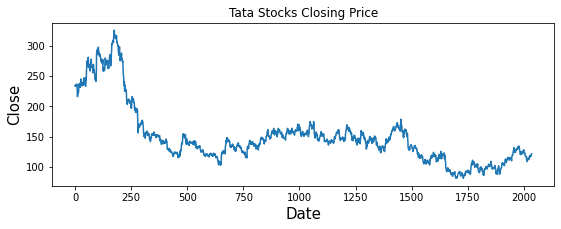

In [ ]:
plt.figure(figsize = (9,3))
plt.title('Tata Stocks Closing Price')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)

Now, we store the target attribute in the 'Close' Column.

In [ ]:
data_close = data.reset_index()['Close']
data_close.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

From the original dataset, we can tell that each of our target value are in close proximity to one another. So, we will use **MinMaxScaler** to scale down all the target variables in the range of (0, 1) for the ease of computation.

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Now, we split our data into Training data (85%) and Testing data (15%)**

In [ ]:
train_size = int(len(data_close) * 0.85)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0 : train_size, :], data_close[train_size : len(data_close), : 1]

In [ ]:
train_size, test_size

(1729, 306)

In [ ]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.02920752],
       [0.02328431],
       [0.01919935]])

Looking at our dataset, we realise that it's a Time Series Dataset.

In [ ]:
def create_dataset(dataset, time_step = 1):
  X_data, Y_data = [], []
  for i in range(len(dataset) - time_step - 1):
	  a = dataset[i : (i + time_step), 0] 
	  X_data.append(a)
	  Y_data.append(dataset[i + time_step, 0])
  return np.array(X_data), np.array(Y_data)

Now, we fix the step size to, say, 100.

In [ ]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1628, 100) (1628,)
(205, 100) (205,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

# **It's now time to create the Stacked LSTM Model**

In [ ]:
lst = Sequential()
lst.add(LSTM(50,return_sequences = True, input_shape = (100, 1)))
lst.add(LSTM(50, return_sequences = True))
lst.add(LSTM(50))
lst.add(Dense(1))
lst.compile(loss = 'mean_squared_error', optimizer='adam')

In [ ]:
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lst.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
26/26 [==============================] - 11s 212ms/step - loss: 0.0157 - val_loss: 0.0022
Epoch 2/100
26/26 [==============================] - 4s 166ms/step - loss: 0.0019 - val_loss: 5.1175e-04
Epoch 3/100
26/26 [==============================] - 4s 169ms/step - loss: 0.0014 - val_loss: 4.5362e-04
Epoch 4/100
26/26 [==============================] - 4s 166ms/step - loss: 0.0013 - val_loss: 4.9668e-04
Epoch 5/100
26/26 [==============================] - 4s 163ms/step - loss: 0.0012 - val_loss: 4.7551e-04
Epoch 6/100
26/26 [==============================] - 4s 167ms/step - loss: 0.0013 - val_loss: 4.1636e-04
Epoch 7/100
26/26 [==============================] - 4s 167ms/step - loss: 0.0013 - val_loss: 4.3589e-04
Epoch 8/100
26/26 [==============================] - 4s 166ms/step - loss: 0.0011 - val_loss: 4.0532e-04
Epoch 9/100
26/26 [==============================] - 4s 167ms/step - loss: 9.6290e-04 - val_loss: 3.8333e-04
Epoch 10/100
26/26 [==============================] - 

**Let's look at the performance of our Model.**

In [ ]:
train_predict = lst.predict(X_train)
test_predict = lst.predict(X_test)

**Reversing the MinMax Scaler**

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(Y_train, train_predict))

156.20654950981535

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

110.85540874025493

**Let's visualise our Predictions.**

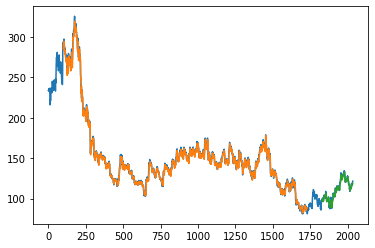

In [ ]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

# Future Prediction

In [ ]:
x_inum_pyut=test_data[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

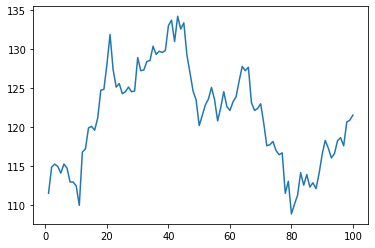

In [ ]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))

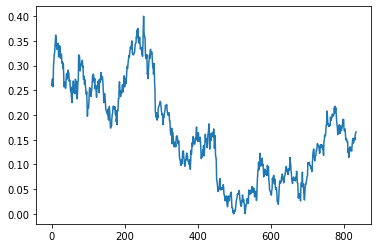

In [ ]:
data_merge = data_close.tolist()
data_merge.extend(lst_output)
plt.plot(data_merge[1200 : ])